## Lab Exercise 1: Introduction to LDA for Dimensionality Reduction

In [40]:
# Load the Dataset:
import pandas as pd
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

iris = datasets.load_iris()

In [41]:
# Data Standardization:
X = data.iloc[:, :-1]  # Features
y = data['Species']     # Target variable

scaler = StandardScaler()
X_standardized = scaler.fit_transform(X)

X_standardized_df = pd.DataFrame(X_standardized, columns=X.columns)

In [42]:
# Apply LDA:
lda = LDA(n_components=2)
X_lda = lda.fit_transform(X_standardized, y)

lda_df = pd.DataFrame(X_lda, columns=['LDA1', 'LDA2'])
lda_df['Species'] = y

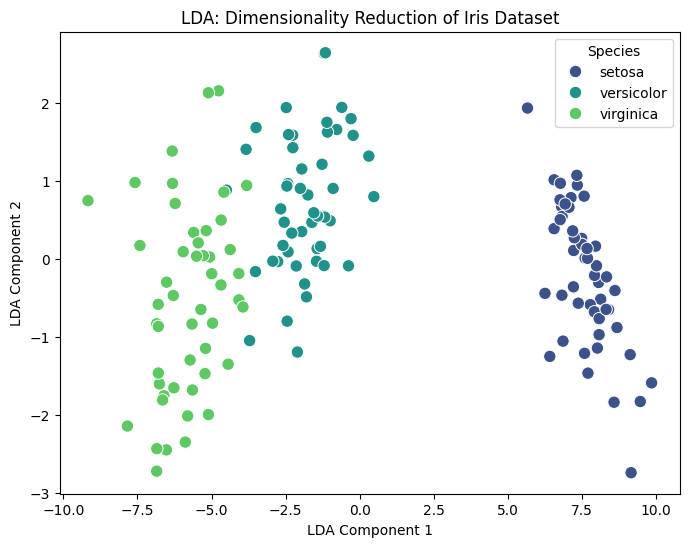

In [43]:
# Visualization:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=lda_df, x='LDA1', y='LDA2', hue='Species', palette='viridis', s=80)
plt.title('LDA: Dimensionality Reduction of Iris Dataset')
plt.xlabel('LDA Component 1')
plt.ylabel('LDA Component 2')
plt.legend(title='Species')
plt.show()

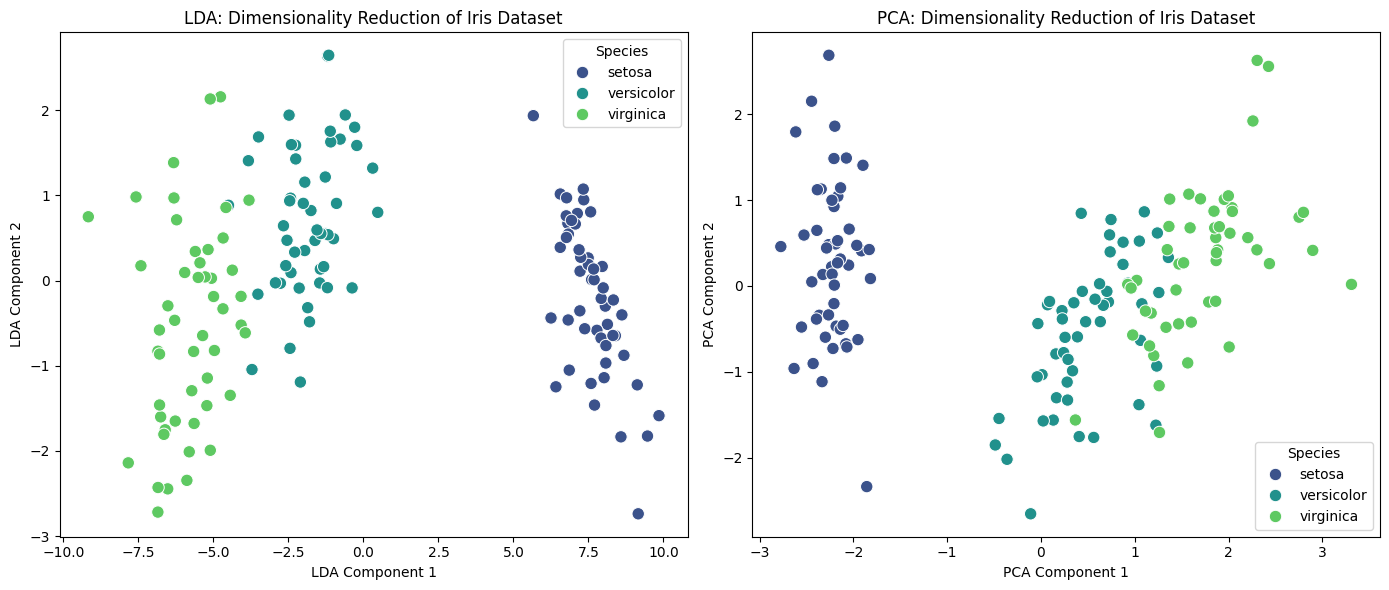

In [45]:
# Compare LDA with PCA:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_standardized)

pca_df = pd.DataFrame(X_pca, columns=['PCA1', 'PCA2'])
pca_df['Species'] = y

# Plot LDA and PCA components
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# LDA Plot
sns.scatterplot(data=lda_df, x='LDA1', y='LDA2', hue='Species', palette='viridis', s=80, ax=axes[0])
axes[0].set_title('LDA: Dimensionality Reduction of Iris Dataset')
axes[0].set_xlabel('LDA Component 1')
axes[0].set_ylabel('LDA Component 2')

# PCA Plot
sns.scatterplot(data=pca_df, x='PCA1', y='PCA2', hue='Species', palette='viridis', s=80, ax=axes[1])
axes[1].set_title('PCA: Dimensionality Reduction of Iris Dataset')
axes[1].set_xlabel('PCA Component 1')
axes[1].set_ylabel('PCA Component 2')

plt.legend(title='Species')
plt.tight_layout()
plt.show()

## Lab Exercise 2: LDA for Classification

In [46]:
# Load the Dataset:
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns

wine = datasets.load_wine()

X = wine_data.drop('quality', axis=1)
y = wine_data['quality']

scaler = StandardScaler()
X = scaler.fit_transform(X)

In [47]:
# Split the Data: (e.g., 70% training, 30% testing).
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [48]:
# Train an LDA Model:
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)
y_pred_lda = lda.predict(X_test)


LDA Classifier Metrics:
Accuracy: 0.53
Precision: 0.51
Recall: 0.53
Confusion Matrix:
 [[  1   0   3   3   0   0   0]
 [  0   8  12  20   0   0   0]
 [  0  18 216 188   3   1   0]
 [  0   6 121 479  61   0   1]
 [  0   0  26 178  76   0   0]
 [  0   1   1  27  20   0   0]
 [  0   0   0   0   0   0   0]]


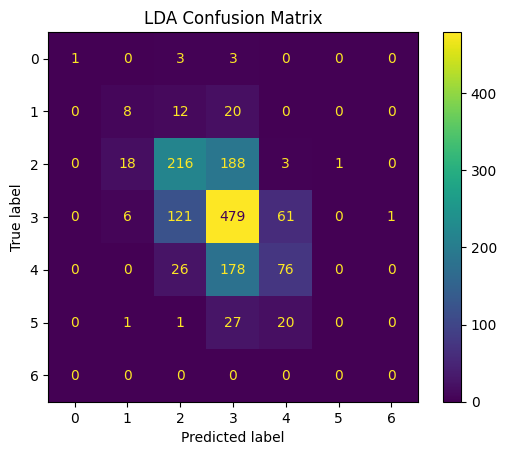

In [49]:
# Evaluate the Model:
lda_accuracy = accuracy_score(y_test, y_pred_lda)
lda_precision = precision_score(y_test, y_pred_lda, average='weighted', zero_division=1)
lda_recall = recall_score(y_test, y_pred_lda, average='weighted', zero_division=1)
lda_conf_matrix = confusion_matrix(y_test, y_pred_lda)

print("LDA Classifier Metrics:")
print(f"Accuracy: {lda_accuracy:.2f}")
print(f"Precision: {lda_precision:.2f}")
print(f"Recall: {lda_recall:.2f}")
print("Confusion Matrix:\n", lda_conf_matrix)

ConfusionMatrixDisplay(lda_conf_matrix).plot()
plt.title("LDA Confusion Matrix")
plt.show()


Logistic Regression Classifier Metrics:
Accuracy: 0.54
Precision: 0.52
Recall: 0.54
Confusion Matrix:
 [[  0   0   3   2   1   1   0]
 [  0   1  20  19   0   0   0]
 [  0   1 235 188   2   0   0]
 [  0   0 126 496  45   0   1]
 [  0   0  22 195  63   0   0]
 [  0   0   2  35  12   0   0]
 [  0   0   0   0   0   0   0]]


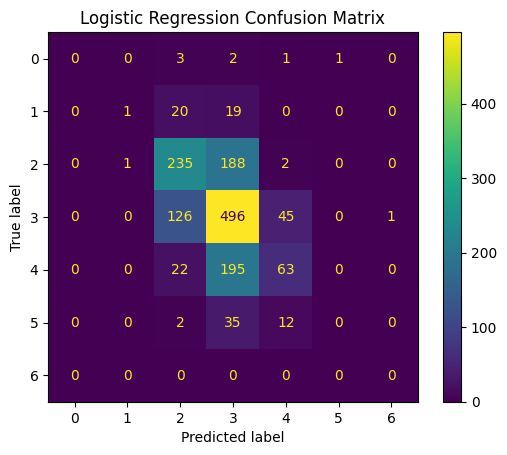


Comparison Summary:
LDA Accuracy: 0.53 | Logistic Regression Accuracy: 0.54
LDA Precision: 0.51 | Logistic Regression Precision: 0.52
LDA Recall: 0.53 | Logistic Regression Recall: 0.54


In [50]:
# Compare with Logistic Regression:
logreg = LogisticRegression(max_iter=2000)
logreg.fit(X_train, y_train)
y_pred_logreg = logreg.predict(X_test)

# Calculate accuracy, precision, recall, and confusion matrix for Logistic Regression
logreg_accuracy = accuracy_score(y_test, y_pred_logreg)
logreg_precision = precision_score(y_test, y_pred_logreg, average='weighted', zero_division=1)
logreg_recall = recall_score(y_test, y_pred_logreg, average='weighted', zero_division=1)
logreg_conf_matrix = confusion_matrix(y_test, y_pred_logreg)

print("\nLogistic Regression Classifier Metrics:")
print(f"Accuracy: {logreg_accuracy:.2f}")
print(f"Precision: {logreg_precision:.2f}")
print(f"Recall: {logreg_recall:.2f}")
print("Confusion Matrix:\n", logreg_conf_matrix)

ConfusionMatrixDisplay(logreg_conf_matrix).plot()
plt.title("Logistic Regression Confusion Matrix")
plt.show()

print("\nComparison Summary:")
print(f"LDA Accuracy: {lda_accuracy:.2f} | Logistic Regression Accuracy: {logreg_accuracy:.2f}")
print(f"LDA Precision: {lda_precision:.2f} | Logistic Regression Precision: {logreg_precision:.2f}")
print(f"LDA Recall: {lda_recall:.2f} | Logistic Regression Recall: {logreg_recall:.2f}")

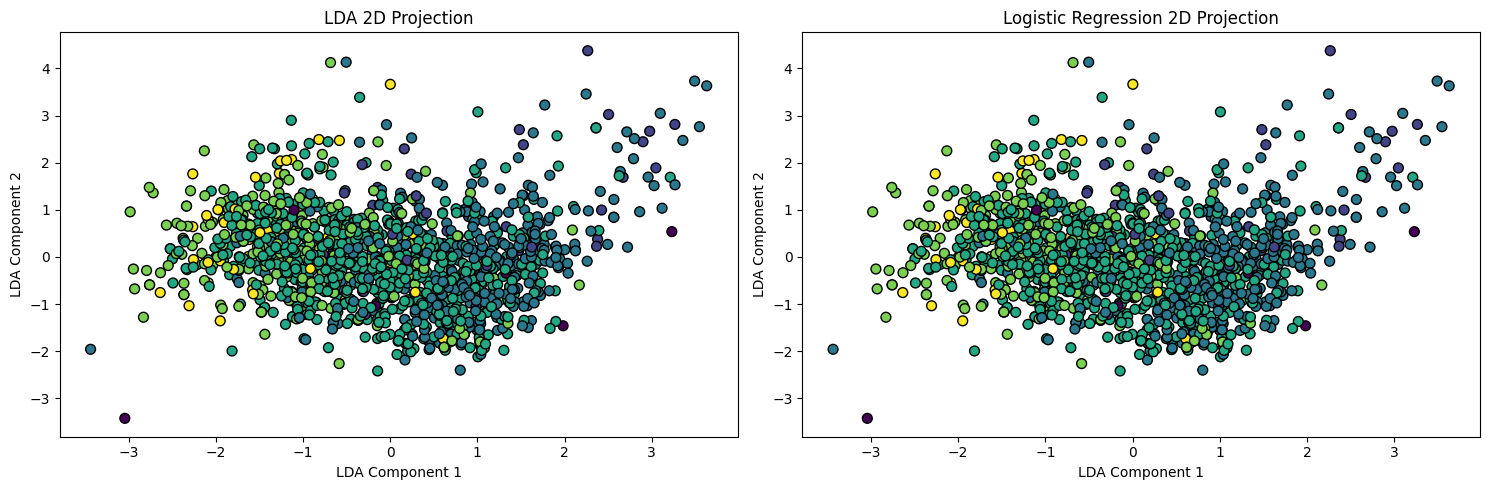

In [51]:
# Visualize Decision Boundaries (Optional):
# Reduce dataset to 2 dimensions using LDA for visualization
lda_2d = LinearDiscriminantAnalysis(n_components=2)
X_train_2d = lda_2d.fit_transform(X_train, y_train)
X_test_2d = lda_2d.transform(X_test)

# Train models on the 2D-reduced data
lda_classifier_2d = LinearDiscriminantAnalysis()
lda_classifier_2d.fit(X_train_2d, y_train)
log_reg_2d = LogisticRegression(max_iter=2000)
log_reg_2d.fit(X_train_2d, y_train)

# Define plot
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# LDA Plot
axes[0].scatter(X_test_2d[:, 0], X_test_2d[:, 1], c=y_test, cmap='viridis', edgecolor='k', s=50)
axes[0].set_title("LDA 2D Projection")
axes[0].set_xlabel("LDA Component 1")
axes[0].set_ylabel("LDA Component 2")

# Logistic Regression Plot
axes[1].scatter(X_test_2d[:, 0], X_test_2d[:, 1], c=y_test, cmap='viridis', edgecolor='k', s=50)
axes[1].set_title("Logistic Regression 2D Projection")
axes[1].set_xlabel("LDA Component 1")
axes[1].set_ylabel("LDA Component 2")

plt.tight_layout()
plt.show()